<a href="https://colab.research.google.com/github/JessicaMishra/leaf-train/blob/master/Copy_of_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [ ]:
!kaggle datasets download -d jessicamishra/dataset

 95% 193M/204M [00:02<00:00, 97.1MB/s]
100% 204M/204M [00:02<00:00, 71.4MB/s]


In [ ]:
!unzip "*.zip"

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
import os
os.makedirs("/content/trained_data", exist_ok=True)
my_dir = "/content/trained_data"

In [ ]:
%cd "/content/trained_data"
!wget -O"export.pkl" "https://drive.google.com/uc?id=1XlaL9Rcs1zaRq72kzObhKET3TJ4Tfzlp"

/content/trained_data
--2020-08-01 10:50:56--  https://drive.google.com/uc?id=1XlaL9Rcs1zaRq72kzObhKET3TJ4Tfzlp
Resolving drive.google.com (drive.google.com)... 74.125.142.138, 74.125.142.101, 74.125.142.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-08-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/t4dfees7v9fgrbscts4l0fptoqm8f9mc/1596279000000/07297538188949642156/*/1XlaL9Rcs1zaRq72kzObhKET3TJ4Tfzlp [following]
--2020-08-01 10:50:59--  https://doc-0k-08-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/t4dfees7v9fgrbscts4l0fptoqm8f9mc/1596279000000/07297538188949642156/*/1XlaL9Rcs1zaRq72kzObhKET3TJ4Tfzlp
Resolving doc-0k-08-docs.googleusercontent.com (doc-0k-08-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-0k-08-docs.googleusercontent.com (doc-0k-08-docs.googleu

In [ ]:
%cd "/content/trained_data"
!wget -O"stage-1.pth" "https://drive.google.com/uc?id=1Cw7q1jAucdlZ5NwN8gLXlQnoXv8sJ230"

/content/trained_data
--2020-08-01 10:51:04--  https://drive.google.com/uc?id=1Cw7q1jAucdlZ5NwN8gLXlQnoXv8sJ230
Resolving drive.google.com (drive.google.com)... 74.125.142.138, 74.125.142.101, 74.125.142.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-08-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v06io21ls8a5f8lupbi5eiuob17e1i5b/1596279000000/07297538188949642156/*/1Cw7q1jAucdlZ5NwN8gLXlQnoXv8sJ230 [following]
--2020-08-01 10:51:07--  https://doc-10-08-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v06io21ls8a5f8lupbi5eiuob17e1i5b/1596279000000/07297538188949642156/*/1Cw7q1jAucdlZ5NwN8gLXlQnoXv8sJ230
Resolving doc-10-08-docs.googleusercontent.com (doc-10-08-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-10-08-docs.googleusercontent.com (doc-10-08-docs.googleu

In [ ]:
data = ImageDataBunch.from_folder( Path("/content/test"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms())

In [ ]:
predictor = load_learner(my_dir)

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.loss.CrossEntropyLoss' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute o

In [ ]:
def my_predictor(img):
  test_img =open_image(img)
  pred_class,pred_idx,outputs=predictor.predict(test_img)
  return pred_class

abies_concolor


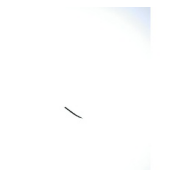

In [ ]:
idx = 0;
print(my_predictor("/content/test/abies_concolor/ny1157-20-4.jpg"))
img = open_image("/content/test/abies_concolor/ny1157-20-4.jpg")
img.show()

In [ ]:
import cv2 
i=0
os.makedirs("/content/test_result",exist_ok=True)
for c in enumerate(data.classes):
 test_files=os.listdir("/content/test/"+str(c[1]))
 for img1 in test_files:
   img=cv2.imread("/content/test/"+str(c[1])+"/"+img1)
   cv2.imwrite("temp.jpg",img)
   ans_text=my_predictor("temp.jpg")
   font = cv2.FONT_HERSHEY_SIMPLEX 
   i+=1
   org = (0, 50) 
   fontScale = 1
   color = (255, 0, 0) 
   thickness = 2
   img = cv2.putText(img, str(ans_text), org, font,fontScale, color, thickness, cv2.LINE_AA) 
   cv2.imwrite("/content/test_result/"+str(i)+".jpg", img)
   #++i


In [ ]:

for c in enumerate(data.classes):
  images = os.listdir("/content/test/"+str(c[1]))
  for img in images:
    middleware("/content/test/"+str(c[1])+"/"+img,img[0])
    # ++i

 

TypeError: ignored

In [ ]:
%cd "test_result"
!ffmpeg -framerate 1 -pattern_type glob -i '*.jpg' \-c:v libx264 -r 1 -pix_fmt yuv420p ../my_final_output.mp4
%cd ..

/content/trained_data/test_result
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --ena

In [ ]:
!rm -rf "/content/test_result"

In [ ]:
!pip install -U kora
from kora.drive import upload_public
url_is = upload_public('my_final_output.mp4')

In [ ]:
from IPython.display import HTML
HTML(f"""<video src={url_is} width=500 controls/>""")